<a href="https://colab.research.google.com/github/thaveesha-mL4v/ML_CW/blob/main/MLCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

### Import Dependencies

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Import the raw dataset



In [2]:
df = pd.read_csv("telcoDataset.csv")

### Data Overview

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the dataset
df.shape

(7043, 21)

In [5]:
# To check general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Describe numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Describe categorical features
df.describe(include='object', exclude='float64')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


##### In the dataset TotalCharges should be in numeric data type. So TotalCharges column data type is changed to numeric.

In [9]:
# Changing TotalCharges data type
df_one = df.copy()
df_one['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Hide SeniorCitizen from numerical description
df_one.drop(columns=['SeniorCitizen']).describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [24]:
# Find unique value count in categorical columns
df_one.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [26]:
# Find unique values in categorical columns
cols = [
    'customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod','Churn'
]

for col in cols:
    print(f"\n--- {col} ---")
    print(df_one[col].unique())



--- customerID ---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--- gender ---
['Female' 'Male']

--- SeniorCitizen ---
[0 1]

--- Partner ---
['Yes' 'No']

--- Dependents ---
['No' 'Yes']

--- PhoneService ---
['No' 'Yes']

--- MultipleLines ---
['No phone service' 'No' 'Yes']

--- InternetService ---
['DSL' 'Fiber optic' 'No']

--- OnlineSecurity ---
['No' 'Yes' 'No internet service']

--- OnlineBackup ---
['Yes' 'No' 'No internet service']

--- DeviceProtection ---
['No' 'Yes' 'No internet service']

--- TechSupport ---
['No' 'Yes' 'No internet service']

--- StreamingTV ---
['No' 'Yes' 'No internet service']

--- StreamingMovies ---
['No' 'Yes' 'No internet service']

--- Contract ---
['Month-to-month' 'One year' 'Two year']

--- PaperlessBilling ---
['Yes' 'No']

--- PaymentMethod ---
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

--- Churn ---
['No' 'Yes']


##### TotalCharges data type is changed. Now looking for null values.

In [27]:
df_one.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##### 11 null values in TotalCharges found. Now checking any null spaces as whitespaces in text data types.

In [28]:
df_two = df_one.copy()
df_two.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_two.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### EDA Visualizations

In [29]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']

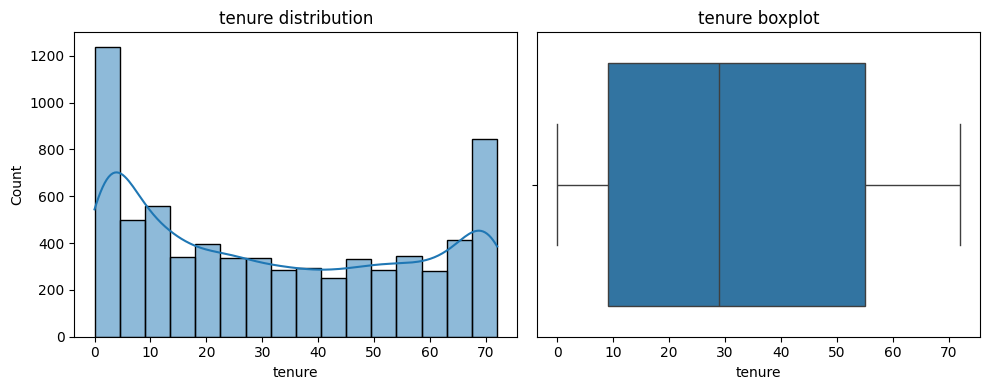

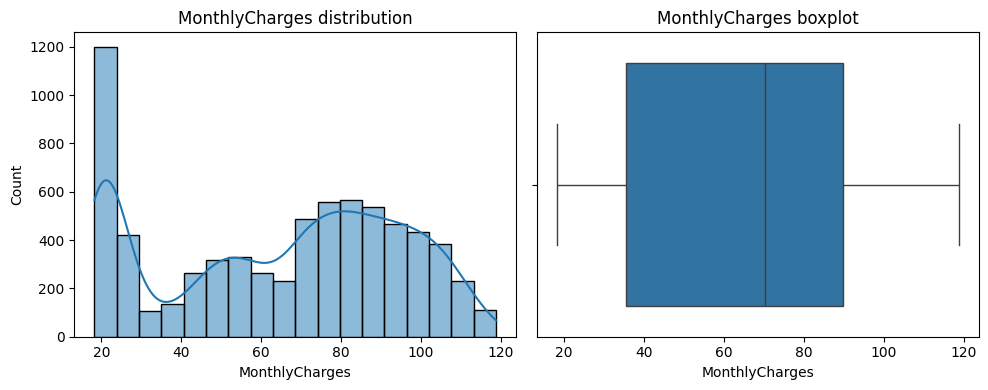

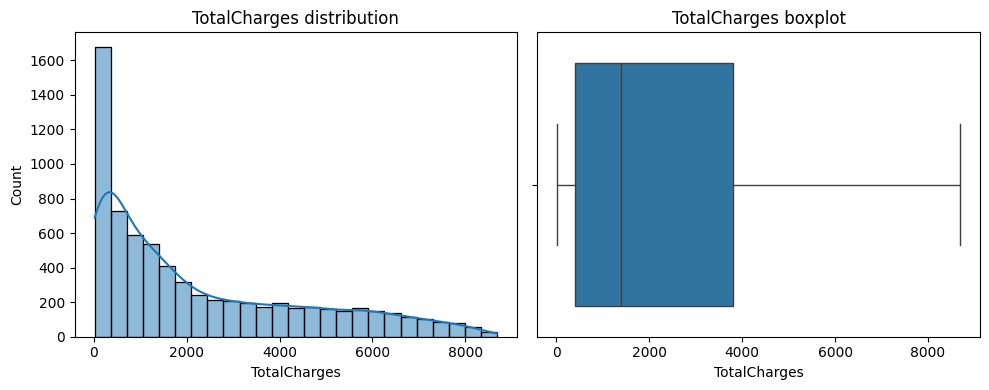

In [32]:
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_two[col], kde=True)
    plt.title(f"{col} distribution")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_two[col])
    plt.title(f"{col} boxplot")

    plt.tight_layout()

    # Show plot
    plt.show()



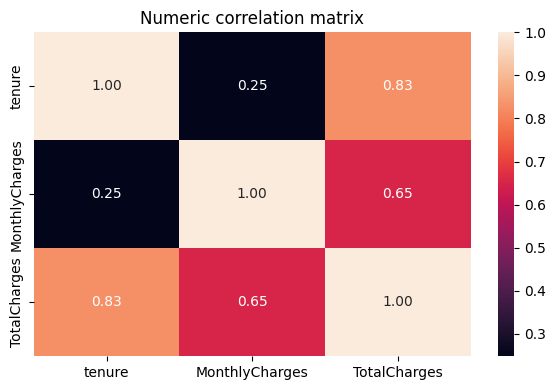

In [33]:
# Correlation matrix (numeric)
plt.figure(figsize=(6,4))
sns.heatmap(df_two[numeric_cols].corr(), annot=True, fmt='.2f')
plt.title('Numeric correlation matrix')
plt.tight_layout()
plt.show()

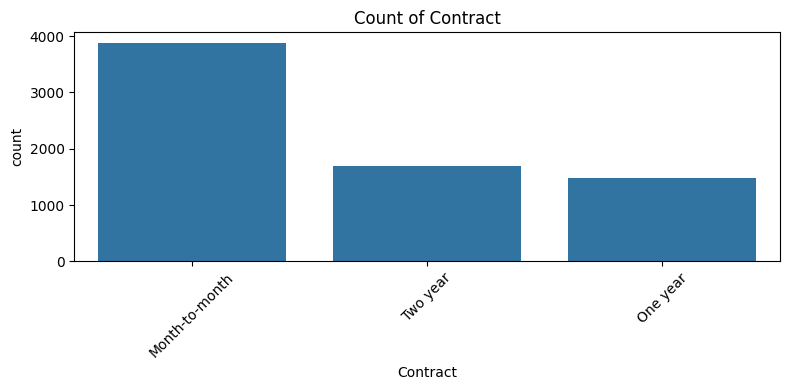

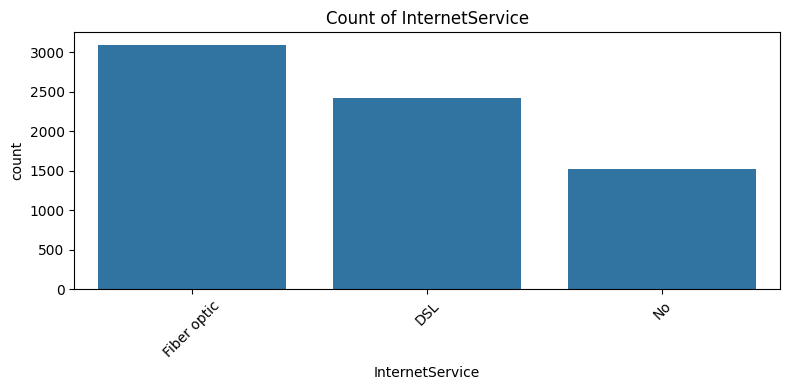

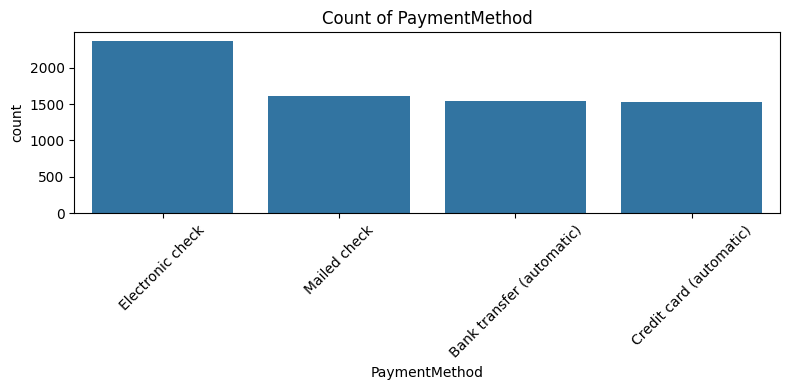

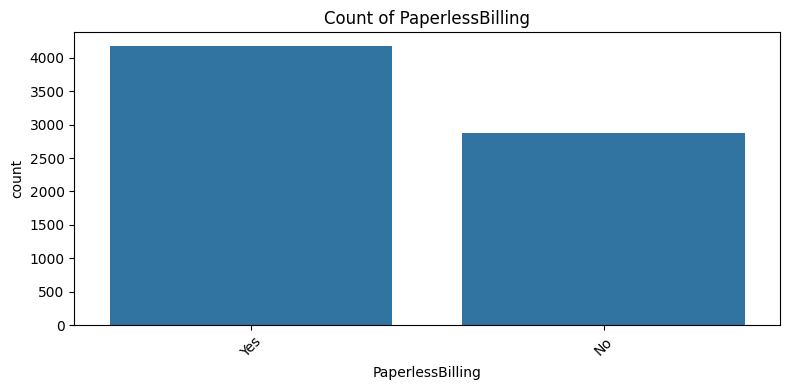

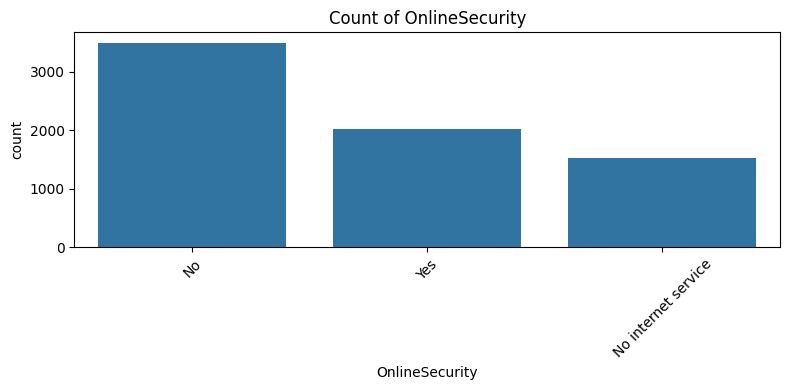

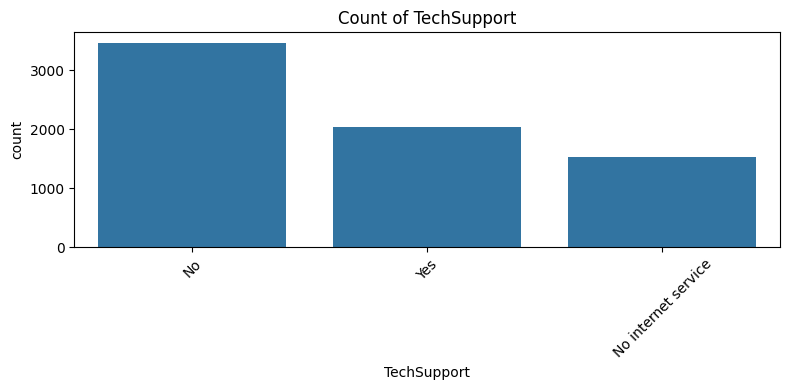

In [34]:
# For categorical features

important_categoricals = ['Contract','InternetService','PaymentMethod','PaperlessBilling','OnlineSecurity','TechSupport']
for col in important_categoricals:
    if col in df_two.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df_two, x=col, order=df_two[col].value_counts().index)
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

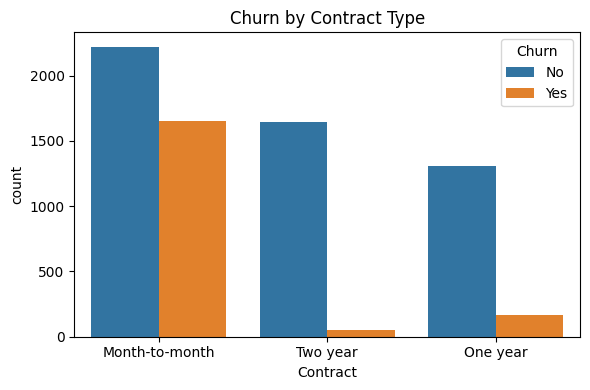

In [37]:
# Churn by Contract plot
if 'Contract' in df_two.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_two, x='Contract', hue='Churn', order=df['Contract'].value_counts().index)
    plt.title("Churn by Contract Type")
    plt.tight_layout()
    plt.show()

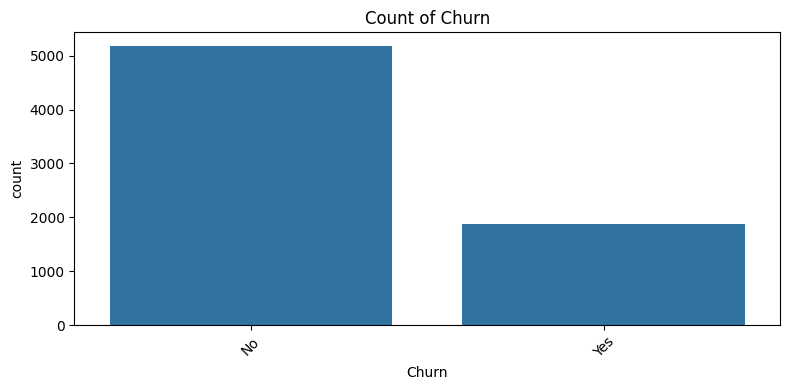

In [36]:
# For target variable


target_variable = ['Churn']
for col in target_variable:
    if col in df_two.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df_two, x=col, order=df_two[col].value_counts().index)
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Data Preprocessing

##### So those 11 TotalCharges are the only missing values.

### Handling missing values

In [38]:
df_three = df_two.copy()
df_three.dropna(inplace=True)
df_three.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [39]:
df_three.to_csv('MissingValuesHandled.csv', index=False)

In [40]:
# Remove customer Id column

df_four=df_three.copy()
df_four.drop(['customerID'], axis=1, inplace=True)
df_four.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Feature Encoding

### Label Encoding

##### Identify binary columns only with yes and no

In [41]:
yes_no_cols = [col for col in df_four.columns
               if set(df_four[col].dropna().unique()) == {"Yes", "No"}]

yes_no_cols


['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

##### Convert these Yes/No columns to 1/0

In [42]:
df_four[yes_no_cols] = df_four[yes_no_cols].replace({"Yes": 1, "No": 0})


/tmp/ipython-input-770554117.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_four[yes_no_cols] = df_four[yes_no_cols].replace({"Yes": 1, "No": 0})


In [19]:
df_four.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [43]:
df_four['gender'] = df_four['gender'].replace({"Male": 1, "Female": 0})

/tmp/ipython-input-4115400034.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_four['gender'] = df_four['gender'].replace({"Male": 1, "Female": 0})


In [44]:
df_four.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [54]:
df_four.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

### One-Hot Encoding

In [56]:
remainder_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
nominal_features = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
norminal_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(
                                                            strategy='constant',
                                                            fill_value='missing'
                                                            )),
                                    ('encoder', OneHotEncoder())
                                ]
                                )

## Feature Scalling

### Scale numerical variables using StandardScaler

In [59]:
numerical_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())
                                ]
                                )

In [60]:
preprocessor = ColumnTransformer(
                                transformers=[
                                            ('num', numerical_transformer, numerical_features),
                                            ('nom', norminal_transformer, nominal_features)
                                ],
                                remainder='passthrough'
                                )

In [65]:
norminal_feature_names = []
for feature in nominal_features:
    unique_values = df_four[feature].unique()
    norminal_feature_names.extend([f"{feature}_{val}" for val in unique_values])

df_cp = df_four.copy()
df_transformed = pd.DataFrame(
                            preprocessor.fit_transform(df_cp),
                            columns=numerical_features+norminal_feature_names+remainder_features
                            )

df_pp = df_transformed

In [67]:
df_pp.head(8)

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,-1.280248,-1.161694,-0.994194,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.064303,-0.260878,-0.173740,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.239504,-0.363923,-0.959649,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.512486,-0.747850,-0.195248,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,-0.995040,1.158489,-0.645369,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
6,-0.424625,0.807802,-0.147313,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7,-0.913552,-1.165018,-0.874169,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   MultipleLines_No phone service           7032 non-null   float64
 4   MultipleLines_No                         7032 non-null   float64
 5   MultipleLines_Yes                        7032 non-null   float64
 6   InternetService_DSL                      7032 non-null   float64
 7   InternetService_Fiber optic              7032 non-null   float64
 8   InternetService_No                       7032 non-null   float64
 9   OnlineSecurity_No                        7032 non-null   float64
 10  OnlineSecurity_Yes                       7032 no

In [69]:
df_pp.describe()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
count,7.032000e+03,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,-1.126643e-16,6.062651e-17,-1.119064e-16,0.481371,0.096701,0.421928,0.343572,0.440273,0.216155,0.497298,...,0.216297,0.336320,0.228100,0.504693,0.162400,0.482509,0.298493,0.903299,0.592719,0.265785
std,1.000071e+00,1.000071e+00,1.000071e+00,0.499688,0.295571,0.493902,0.474934,0.496455,0.411650,0.500028,...,0.411748,0.472483,0.419637,0.500014,0.368844,0.499729,0.457629,0.295571,0.491363,0.441782
min,-1.280248e+00,-1.547283e+00,-9.990692e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.394171e-01,1.845440e-01,-3.908151e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,9.199259e-01,8.331482e-01,6.668271e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.612573e+00,1.793381e+00,2.824261e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
df_pp.to_csv(
            'TransformedDataset.csv',
            index=False
            )

# Handle class imbalance

In [72]:
df_pp['Churn'].value_counts()

,count
Churn,
0.0,5163
1.0,1869


In [73]:
df_pp['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
0.0,73.421502
1.0,26.578498


In [74]:
X = df_pp.drop(columns=['Churn'])
Y = df_pp['Churn']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, Y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [79]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Count')

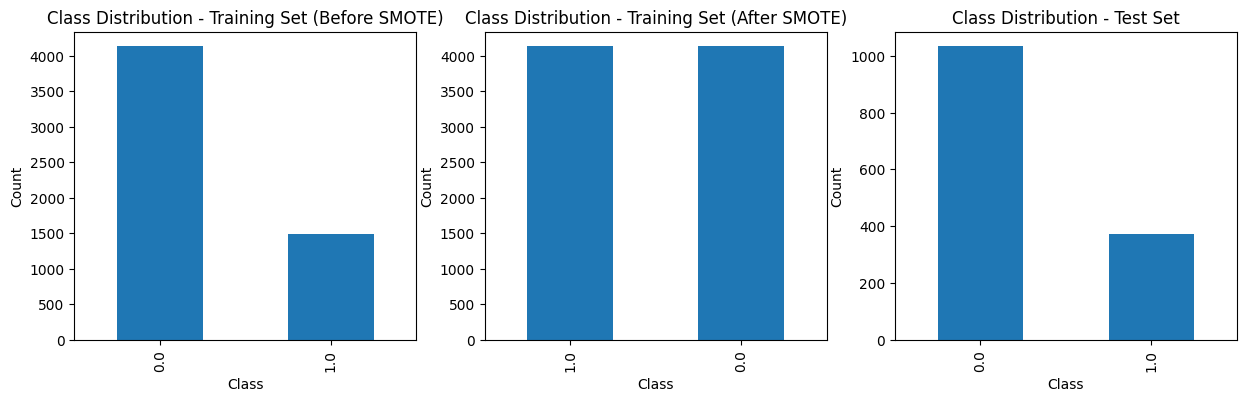

In [80]:
plt.figure(figsize=(15, 4))

# Before SMOTE
plt.subplot(131)
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE
plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Test Set
plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

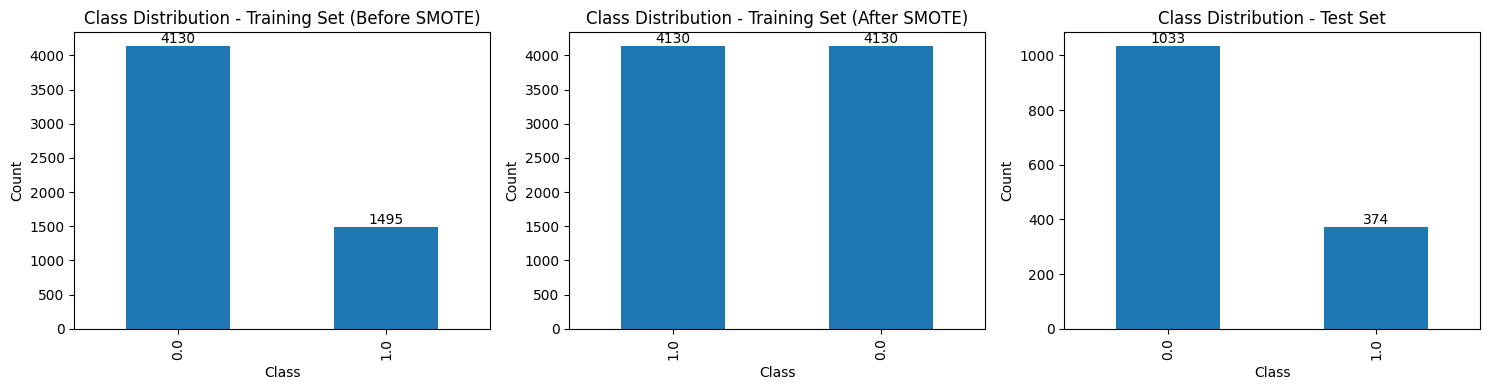

In [81]:
plt.figure(figsize=(15, 4))

# --- Before SMOTE ---
plt.subplot(131)
ax1 = Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Add value labels
for p in ax1.patches:
    ax1.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')


# --- After SMOTE ---
plt.subplot(132)
ax2 = Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Add value labels
for p in ax2.patches:
    ax2.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')


# --- Test Set ---
plt.subplot(133)
ax3 = Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

# Add value labels
for p in ax3.patches:
    ax3.annotate(str(int(p.get_height())),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [82]:
np.savez('X_train.npz', X_train_resampled)
np.savez('Y_train.npz', Y_train_resampled)
np.savez('X_test.npz', X_test)
np.savez('Y_test.npz', Y_test)

# Neural Network Base Model Training

In [83]:
X_train = np.load('X_train.npz')['arr_0']
Y_train = np.load('Y_train.npz')['arr_0']
X_test = np.load('X_test.npz')['arr_0']
Y_test = np.load('Y_test.npz')['arr_0']

In [84]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8260, 40) (8260,)
(1407, 40) (1407,)


### Build Neural Network Model

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

n_features = X_train.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.1),

    Dense(1, activation='sigmoid')   # binary output
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [86]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


### Train Model

In [87]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6608 - auc: 0.7336 - loss: 0.6716 - val_accuracy: 0.7491 - val_auc: 0.8233 - val_loss: 0.4841
Epoch 2/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7509 - auc: 0.8253 - loss: 0.5157 - val_accuracy: 0.7342 - val_auc: 0.8239 - val_loss: 0.4991
Epoch 3/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7669 - auc: 0.8422 - loss: 0.4896 - val_accuracy: 0.7420 - val_auc: 0.8254 - val_loss: 0.4969
Epoch 4/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7682 - auc: 0.8428 - loss: 0.4899 - val_accuracy: 0.7299 - val_auc: 0.8259 - val_loss: 0.5068
Epoch 5/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7677 - auc: 0.8452 - loss: 0.4860 - val_accuracy: 0.7385 - val_auc: 0.8265 - val_loss: 0.5109
Epoch 6/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7680 - auc: 0.8498 - loss: 0.4797 - val_accuracy: 0.7420 - val_auc: 0.8252 - val_loss: 0.5018
Epoch 7/30
259/259 ━━━━━━━━━━━━━━━━━━━━ 

### Plot Loss + Accuracy

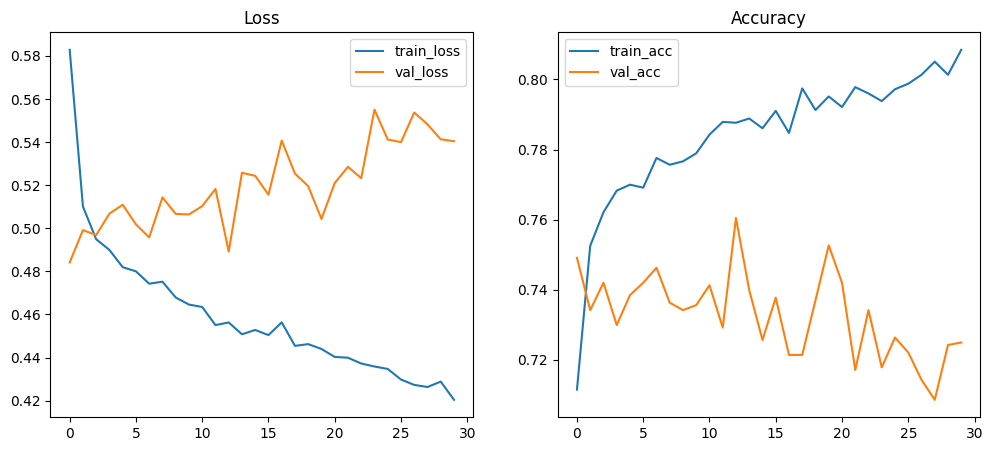

In [88]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Accuracy")

plt.show()


### Evaluate Model

In [89]:
model.evaluate(X_test, Y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - auc: 0.8180 - loss: 0.5120


[0.5403981804847717, 0.7249466776847839, 0.8043171763420105]

### Confusion Matrix

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


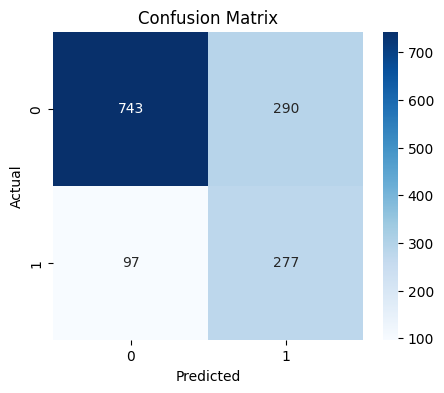

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Decision Tree Model Training

In [91]:
X_train = np.load('X_train.npz')['arr_0']
Y_train = np.load('Y_train.npz')['arr_0']
X_test = np.load('X_test.npz')['arr_0']
Y_test = np.load('Y_test.npz')['arr_0']

In [104]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0,criterion='entropy')
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [105]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [106]:
predTree = clf.predict(X_test)
predTree[0:5]

array([0., 0., 1., 0., 0.])

In [107]:
Y_test[0:5]


array([0., 0., 1., 0., 0.])

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
predictions_train = clf.predict(X_train)
predictions_train[0:5]


array([1., 1., 1., 0., 0.])

In [110]:
Y_train[0:5]


array([1., 1., 1., 0., 0.])

In [111]:
accuracy_score(Y_train,predictions_train)

0.9984261501210654

In [112]:
predictions_test = clf.predict(X_test)
predictions_test[0:5]

array([0., 0., 1., 0., 0.])

In [113]:
Y_test[0:5]

array([0., 0., 1., 0., 0.])

In [114]:
accuracy_score(Y_test,predictions_test)

0.7192608386638237

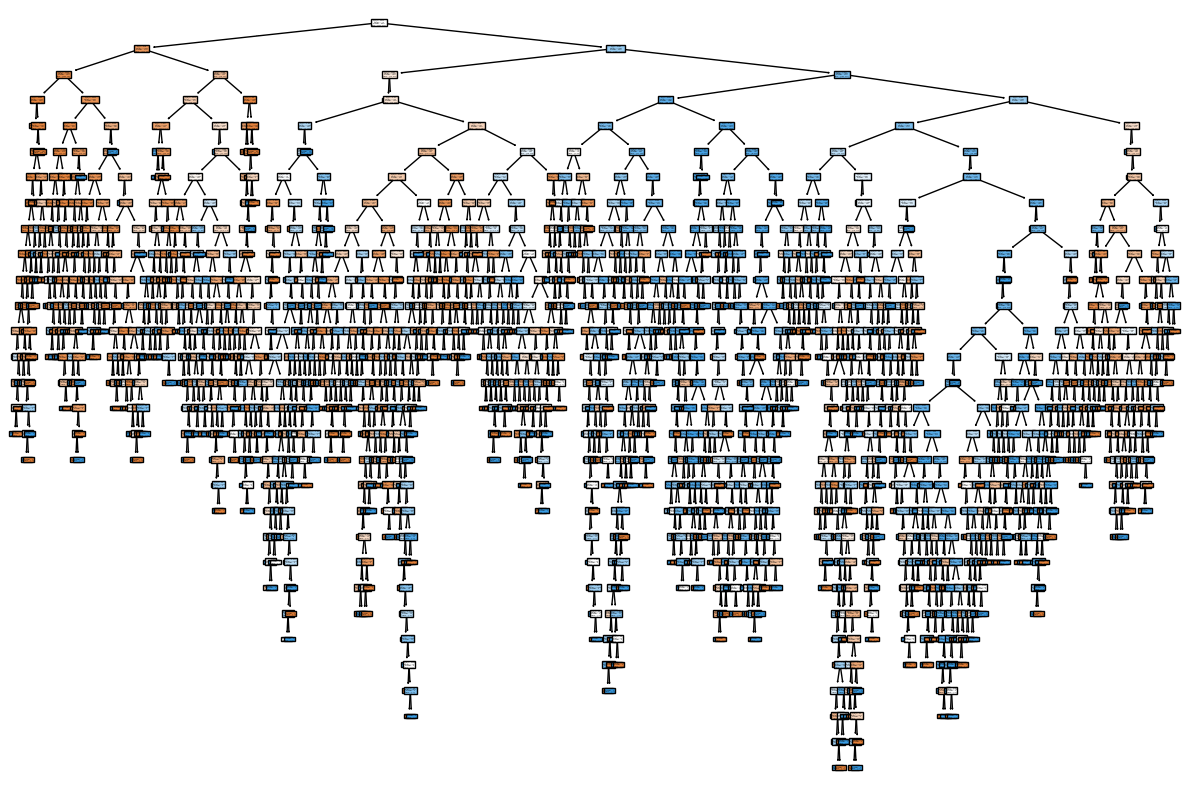

In [115]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### --------------------------------------------------------------------